##Shalateen Map using PyGMT

Import pygmt

In [1]:
!sudo apt-get update
!sudo  apt-get install gmt gmt-dcw gmt-gshhg
!sudo apt-get install -y ghostscript
!pip install pygmt
import os
!ln -s  /lib/x86_64-linux-gnu/libgmt.so.6  /lib/x86_64-linux-gnu/libgmt.so
os.environ['LD_LIBRARY_PATH'] = ' /lib/x86_64-linux-gnu/libgmt.so'

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,387 kB]
Get:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:13 http://security.ubunt

#Base Map

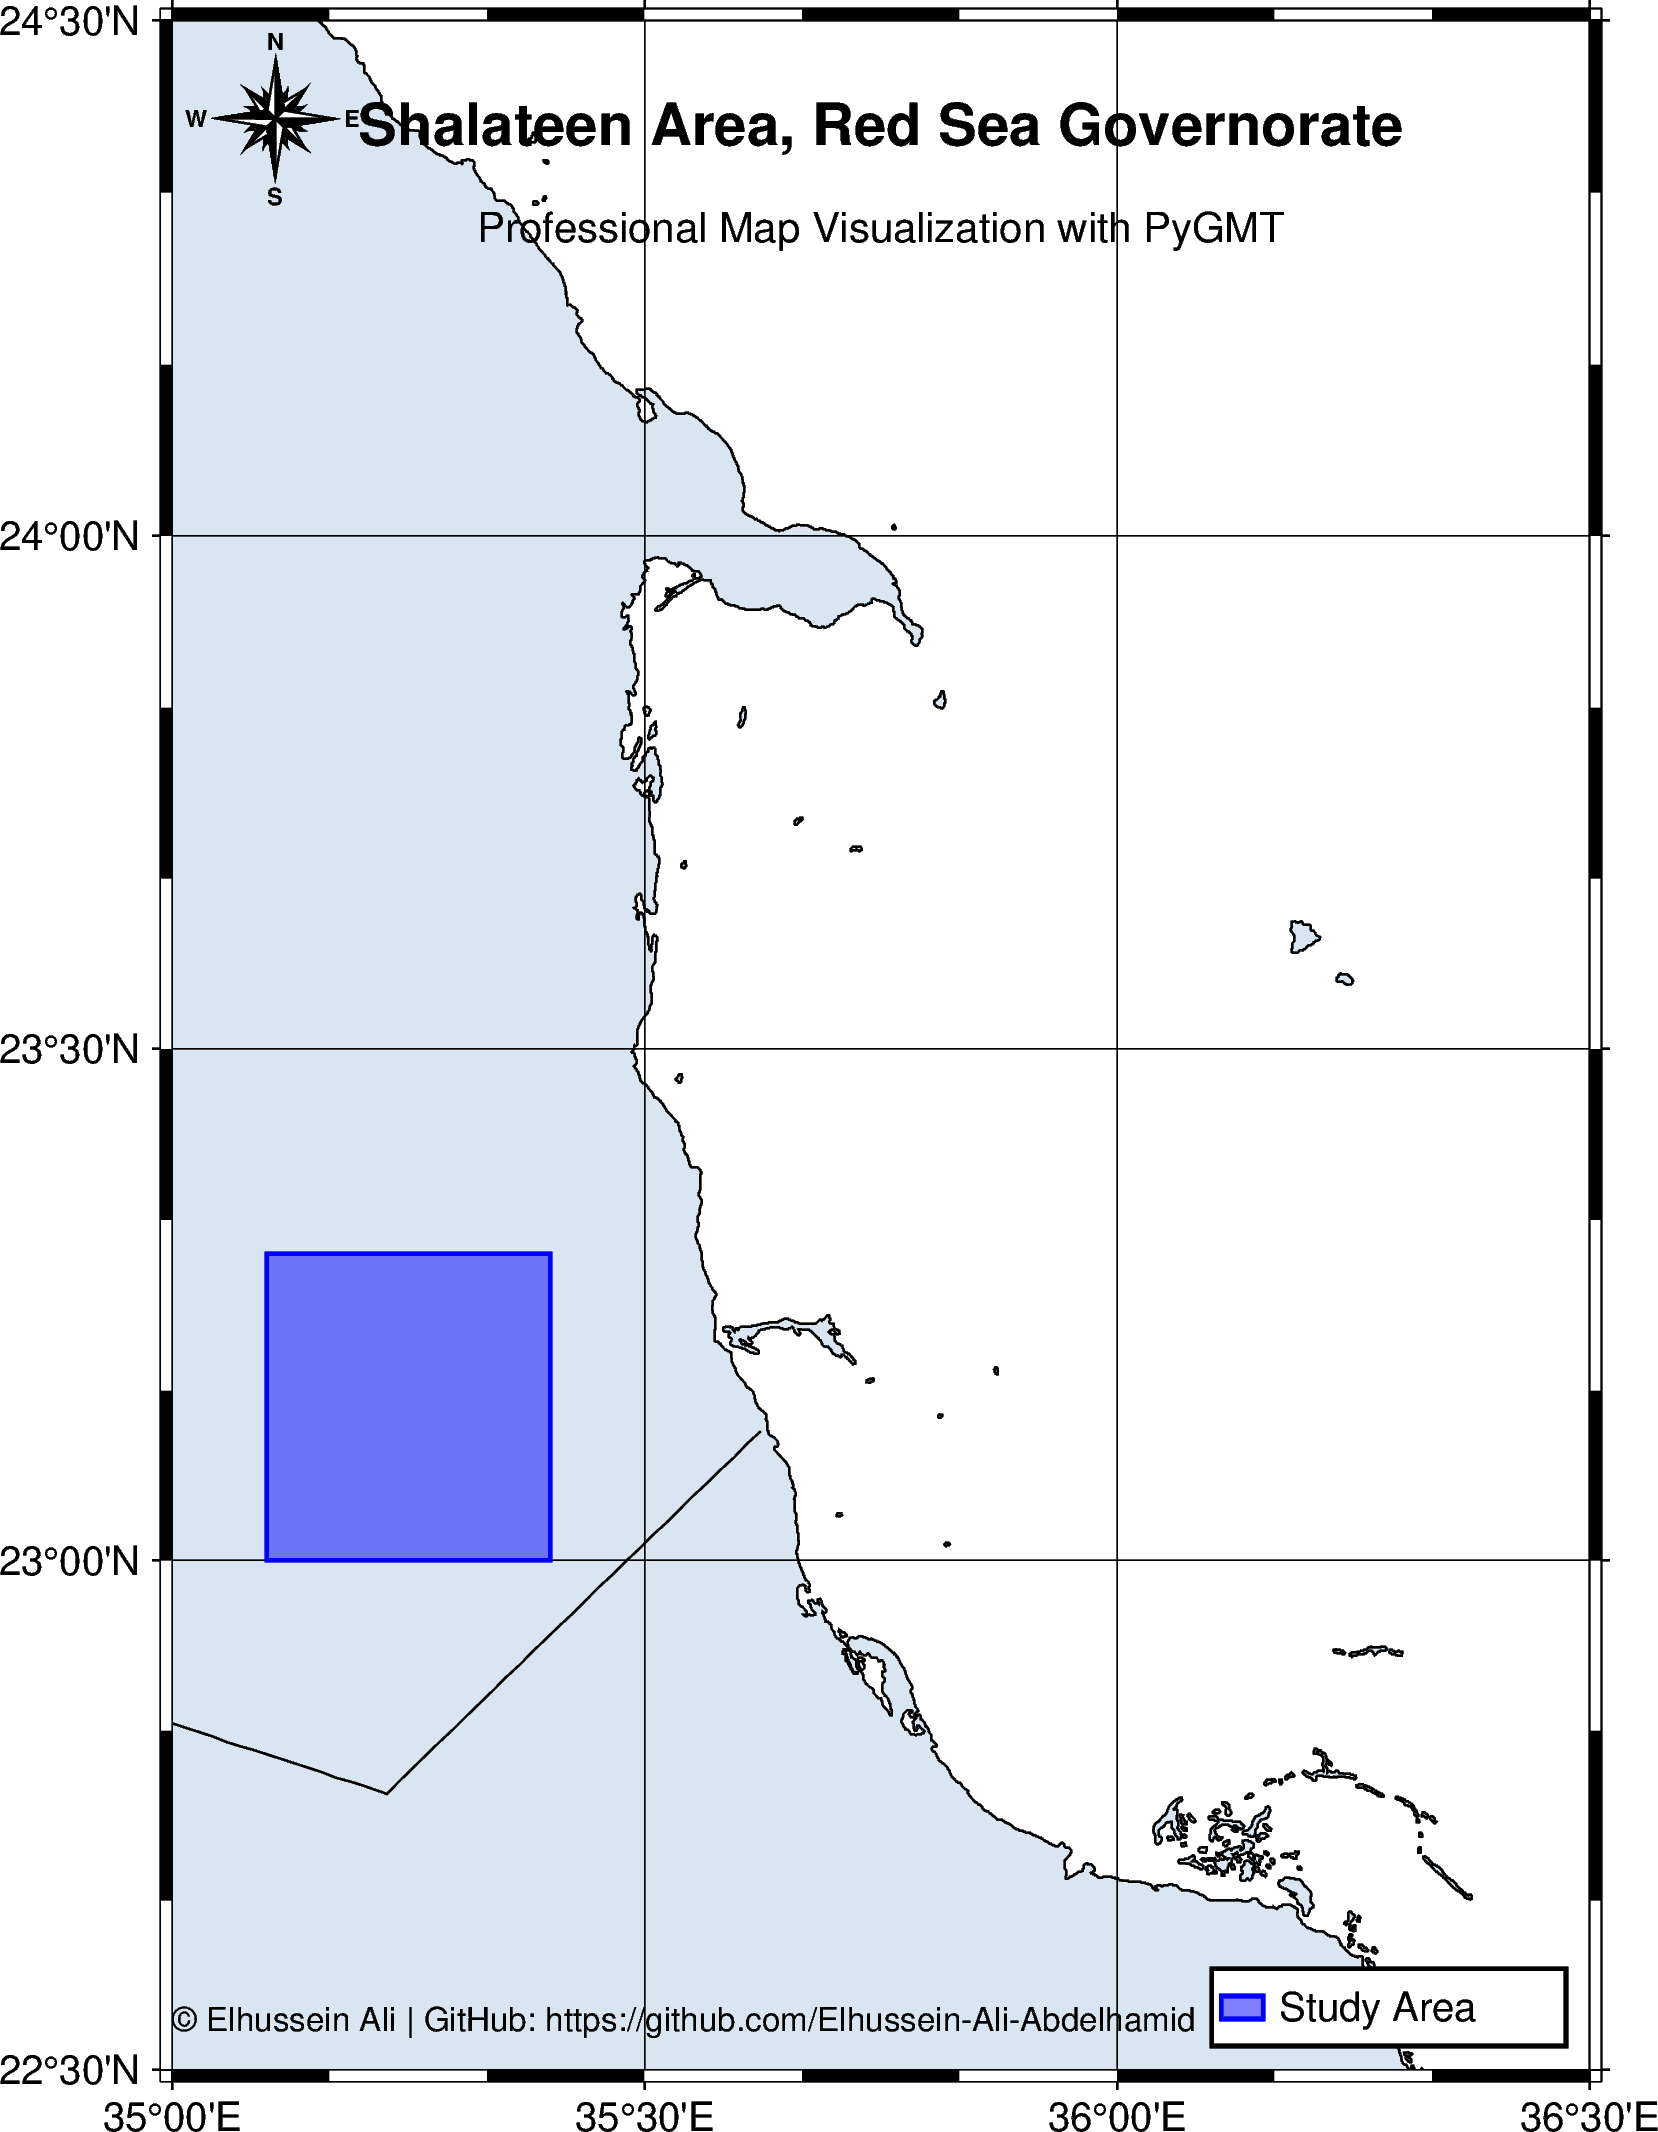

In [56]:
import pygmt

fig = pygmt.Figure()

# Set region to Shalateen area with Mercator projection
fig.coast(
    region=[35.0, 36.5, 22.5, 24.5],  # West, East, South, North bounds (Shalateen area)
    projection="M12c",  # Mercator projection, 12 cm width
    land="#D9E6F2",
    water="white",
    borders=["1/0.5p,black", "2/0.5p,red"],  # country and state borders
    shorelines="1/0.5p,black",
    frame="afg",
)


# Define polygon coordinates (example around Shalateen)
polygon = np.array([
    [35.1, 23],  # Vertex 1
    [35.4, 23],  # Vertex 2
    [35.4, 23.3],  # Vertex 3
    [35.1, 23.3],  # Vertex 4
    [35.1, 23],  # Close the polygon
])

# Draw the polygon
fig.plot(
    data=polygon,
    fill="blue@50",  # Semi-transparent blue fill
    pen="1p,blue",  # Border properties
    label="Study Area",
)

# Add title and subtitle
fig.text(
    x=35.75, y=24.4,
    text="Shalateen Area, Red Sea Governorate",
    font="14p,Helvetica-Bold,black",
    justify="CM",
)
fig.text(
    x=35.75, y=24.3,
    text="Professional Map Visualization with PyGMT",
    font="10p,Helvetica,black",
    justify="CM",
)

# Add scale bar and north arrow
fig.basemap(rose="jTL+w1c+f3+l")
# Add your logo/credit
fig.text(
    x=35.0, y=22.55,
    text="© Elhussein Ali | GitHub: https://github.com/Elhussein-Ali-Abdelhamid",
    font="8p,Helvetica,black",
    justify="LM",
)

fig.legend(
    position="jBR+w3c+o0.2c",
    box="+gwhite+p1p",
)

# Save high quality image
fig.savefig("shalateen_map.png", dpi=900)
fig.show()

#Geo Map

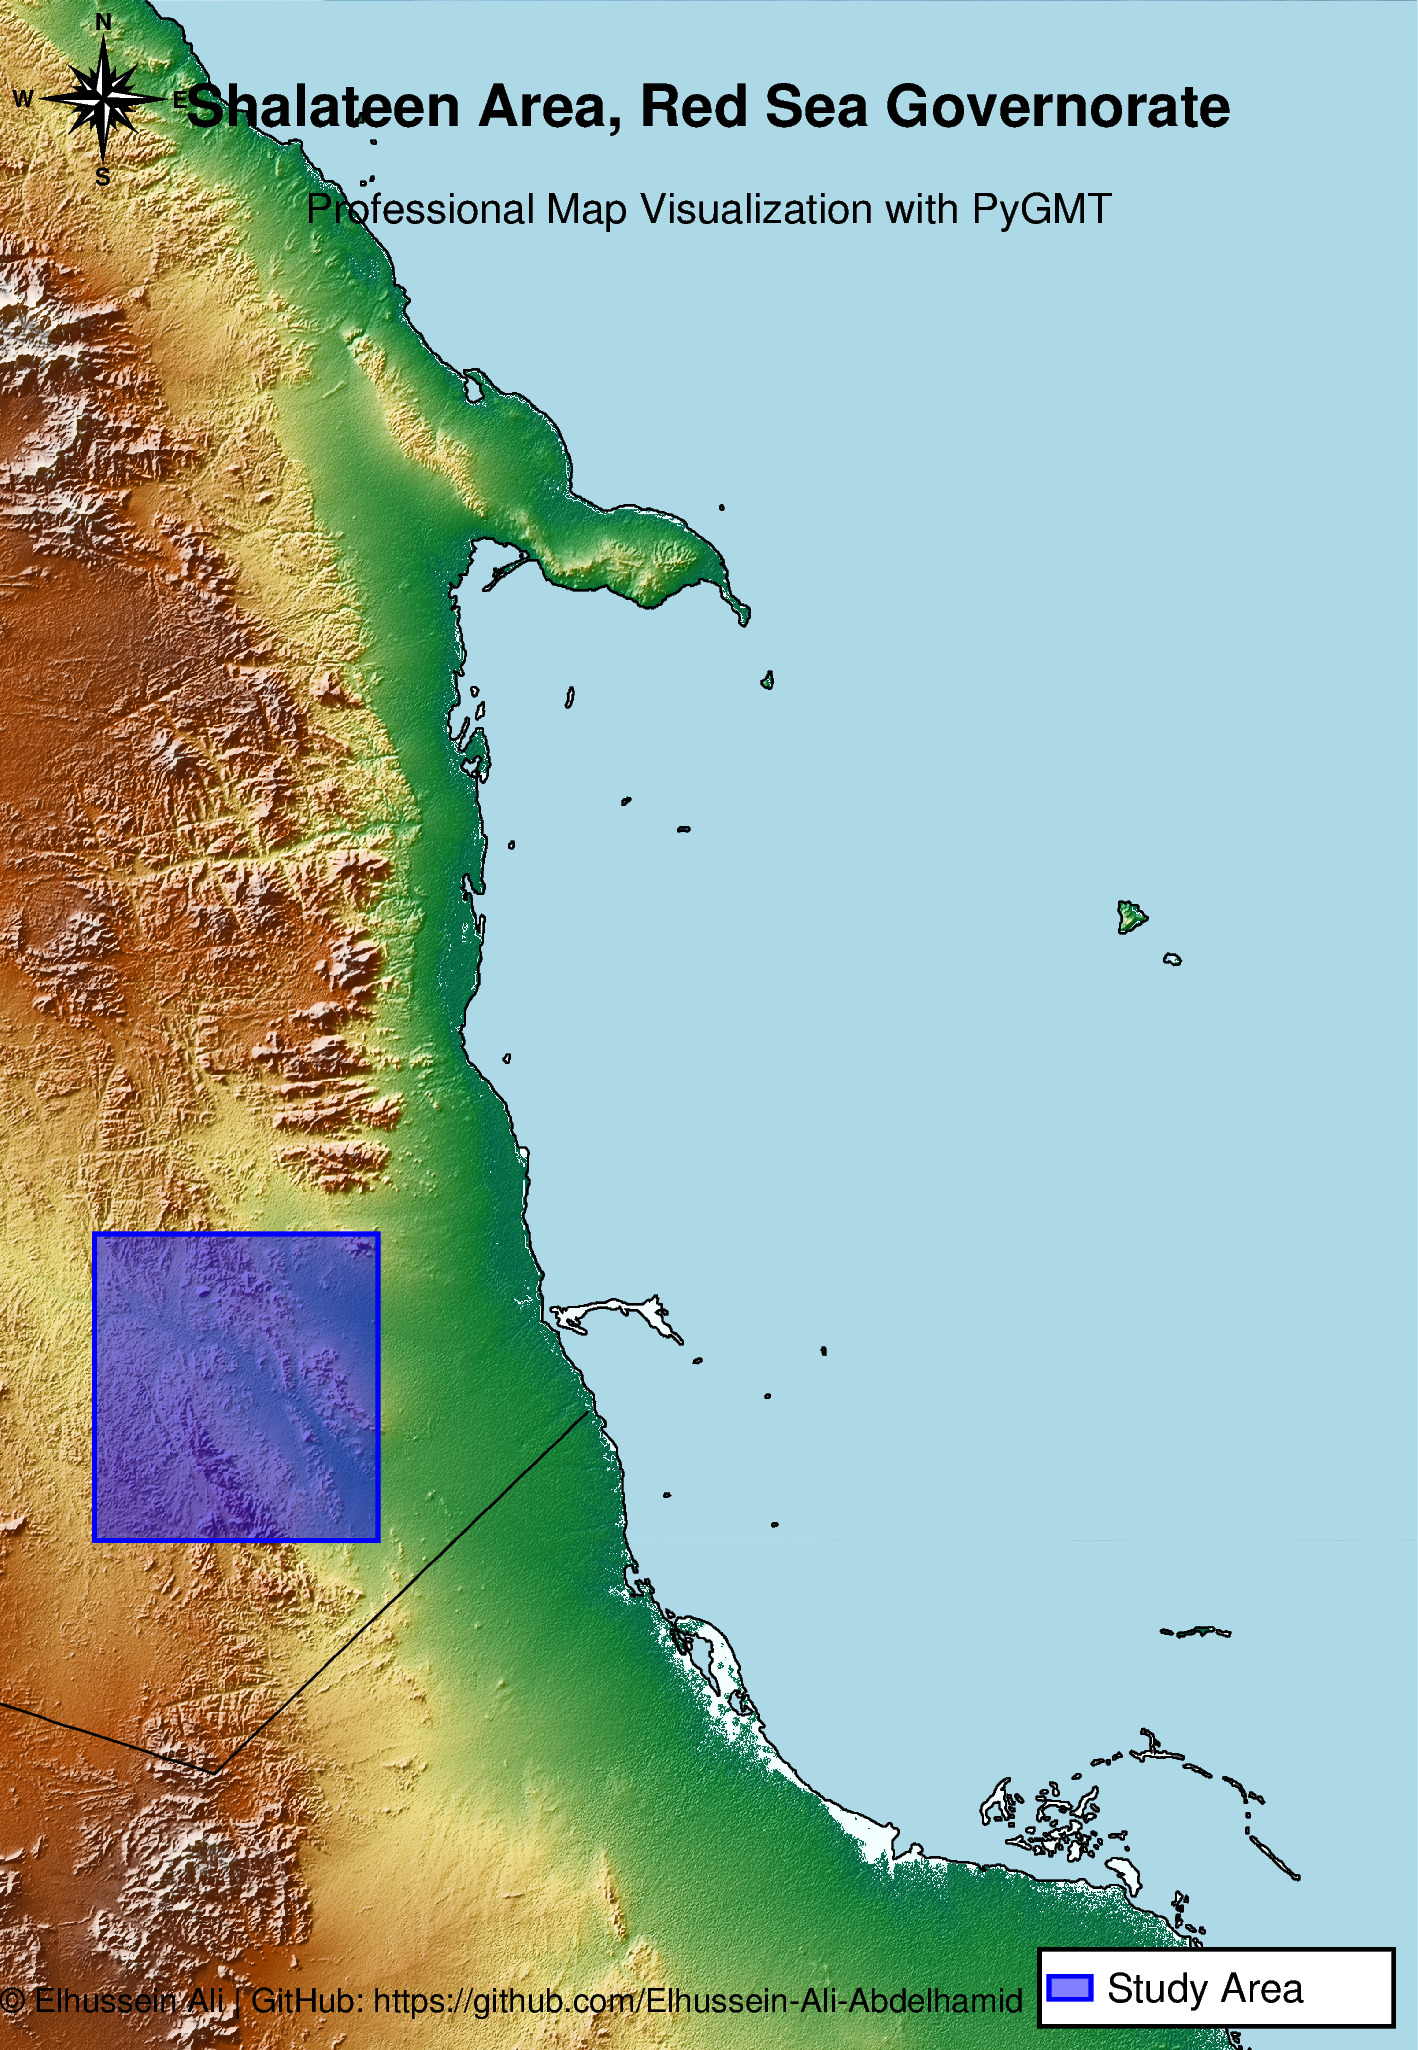

In [59]:
import pygmt
import numpy as np

# Create figure
fig = pygmt.Figure()

# Set region to Shalateen area
region = [35.0, 36.5, 22.5, 24.5]

# Create a base map with topography
fig.grdimage(
    grid="@earth_relief_03s",
    region=region,
    projection="M12c",
    cmap="geo",
    shading=True,
)

# Add coastline and borders
fig.coast(
    shorelines="1/0.5p,black",
    borders=["1/0.5p,black"],
    water="lightblue",
)

# Define polygon coordinates (example around Shalateen)
polygon = np.array([
    [35.1, 23],  # Vertex 1
    [35.4, 23],  # Vertex 2
    [35.4, 23.3],  # Vertex 3
    [35.1, 23.3],  # Vertex 4
    [35.1, 23],  # Close the polygon
])

# Draw the polygon
fig.plot(
    data=polygon,
    fill="blue@50",  # Semi-transparent blue fill
    pen="1p,blue",  # Border properties
    label="Study Area",
)

# Add legend
fig.legend(
    position="jBR+w3c+o0.2c",
    box="+gwhite+p1p",
)

# Add title and credit
fig.text(
    x=35.75, y=24.4,
    text="Shalateen Area, Red Sea Governorate",
    font="14p,Helvetica-Bold,black",
    justify="CM",
)
fig.text(
    x=35.75, y=24.3,
    text="Professional Map Visualization with PyGMT",
    font="10p,Helvetica,black",
    justify="CM",
)
fig.text(
    x=35.0, y=22.55,
    text="© Elhussein Ali | GitHub: https://github.com/Elhussein-Ali-Abdelhamid",
    font="8p,Helvetica,black",
    justify="LM",
)
# Add scale bar and north arrow
fig.basemap(rose="jTL+w1c+f3+l")

# Save and show

fig.show()